# 이커머스 데이터 활용 지표 개발(RFM)

## 문제 상황  

A사는 오픈마켓 플랫폼을 운영 중이다. 런칭 이후 사용자들이 빠르게 상승하였지만, 현재는 정체기에 빠져있다. 현재 서비스 이용 수준이  
어떻게 되고 있으며 런칭 이후 어떻게 변해왔는지를 파악하기 위해 다양한 분석을 수행하고자 한다.

## 문제 해결 프로세스  

1. 문제정의

- 런칭 이후 서비스 정체기로 인한 영업이익, 사용 고객수 감소

2. 기대효과

- 정체 원인 파악 및 대응책 수립 및 실행을 통한 영업이익, 사용 고객수 증가 

3. 해결방안

- 구매 데이터 활용 서비스 이용 현황 파악(지표 기획)

4. 성과측정

- 지표 활용 서비스 사용 현황 파악

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('C:/Users/USER/Desktop/Practice Project - ETC/이커머스 데이터 활용 지표 개발/이커머스 데이터 활용 지표 개발.csv', encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
print("총 결측치 수: {} = 전체 데이터의 {:.2f}%".format(df.isnull().sum().sum(), (df.isnull().sum().sum()*100)/(df.shape[0]*df.shape[1])))

총 결측치 수: 136534 = 전체 데이터의 3.15%


#### 변수 해석 3가지  

1. 결측치 존재 여부

- 전체 데이터에서 Description, CustomerID 변수에서 결측치가 존재한다.

- 결측치의 개수는 전체 3%정도 되는 136534개이다.

- 결측치를 대체하는 경우, object형태는 최빈값으로 대체하고, float64형태는 평균으로 대체하거나 KNN을 사용할 수 있다.

- 하지만, 결측치의 개수가 전체 데이터에 비해 적기 때문에 제거하는 것이 좋아보인다.

2. 데이터 타입 설명

- object형태 5개, int64형태 1개, float64형태 2개로 구성되어 있다.

3. 컬럼 설명

- InvoiceNo : 송장번호
- StockCode : 재고코드
- Description : 상세설명
- Quantity : 수량
- InvoiceDate : 송장날짜
- UnitPrice : 개당가격
- CustomerID : 고객ID
- Country : 나라

In [6]:
df.dropna(subset=['CustomerID'], how='all', inplace=True)
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

결측치 데이터가 작아서 결측치를 모두 제거하는 것도 있지만, 고객ID 정보가 없는 주문에 대해서는 분석이 이루어질 수 없기 때문이기도 하다

In [7]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


우선 describe로 이상치를 판단하기 위해서는 mean, min, max 값을 확인하는 것이 좋다. mean과 min, mean과 max 값이 std에 비해 한참 차이가 난다면, 이상치가 있을 가능성이 높다. 추가로 음수값도 확인하는 것이 좋다 

이러한 이상치를 정확히 판단하기 위해서는 아래와 같이 boxplot으로 시각화하여 보는 것이 정확하다.

In [8]:
df_n = df.select_dtypes(exclude = 'object')

In [9]:
outlier = pd.melt(df_n, var_name = '이상치 탐색 변수', value_name = '이상치 탐색 값')
outlier

,이상치 탐색 변수,이상치 탐색 값
0,Quantity,6.0
1,Quantity,6.0
2,Quantity,8.0
3,Quantity,6.0
4,Quantity,6.0
...,...,...
1220482,CustomerID,12680.0
1220483,CustomerID,12680.0
1220484,CustomerID,12680.0
1220485,CustomerID,12680.0


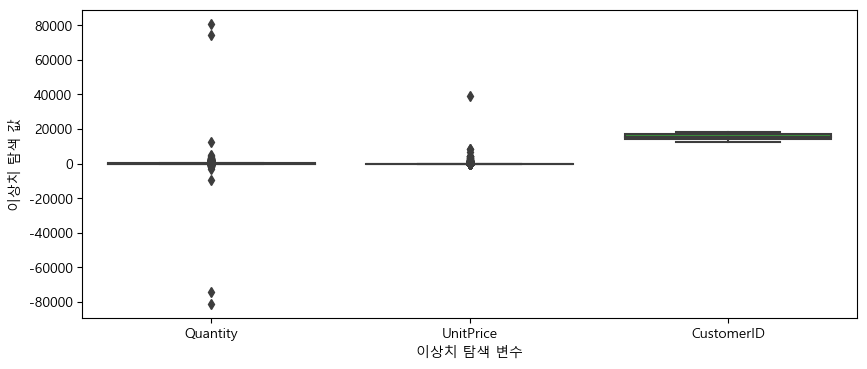

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rc
rc("font", family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize = (10,4))
sns.boxplot(x = '이상치 탐색 변수', y = '이상치 탐색 값', data = outlier)
plt.xticks(range(3), df_n.columns)
plt.show()

이상치를 탐색하기 위해서 수치형 변수들만 선택해서 boxplot으로 시각화하였다. 이상치의 값이 연속적으로 나타나면, 보통 의미있는 값일 확률이 높기 때문에 따로 제거하거나 대체하지 않고, 눈에 띄는 이상치가 있을 경우에는 보통 제거하거나 대체하는 경우가 많다. 위의 Quantity 변수는 음수값도 존재하기에 분포 확인이 필요해보인다(예를 들어, Age 변수가 999값이 있으면 제거하거나 대체하는 것이 옳다.)

<AxesSubplot:xlabel='Quantity', ylabel='Density'>

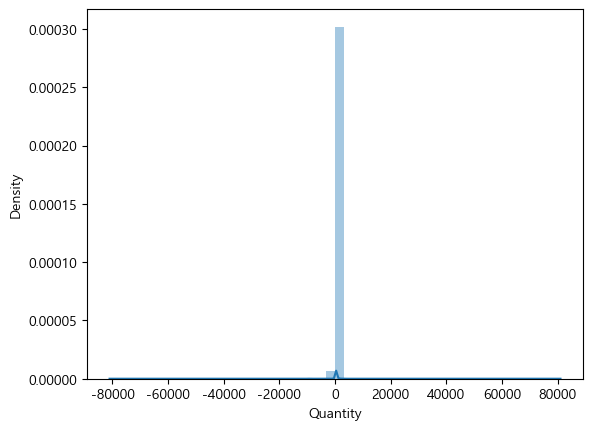

In [11]:
sns.distplot(df['Quantity'])

음수값을 확인한 결과, 매우 적은 데이터가 분포하고 있는 것을 확인할수 있다. 따라서 음수값 제거를 하는 것이 좋아보인다

In [13]:
df = df[df['Quantity']>0]
df = df[df['UnitPrice']>0]
df.describe()

,Quantity,UnitPrice,CustomerID
count,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116488,15294.423453
std,179.331775,22.097877,1713.141560
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


Quantity는 음수값 제거, UnitPrice는 0보다 큰 값으로 설정해준다. 개당가격이 0의 값은 존재하지 않을 것이기에 제거해준다

In [16]:
print("이용 고객수 : ", df['CustomerID'].nunique()) 
print("")
print("이용 품목건수 : ", df['Quantity'].sum())
print("")
print("이용 나라 : ", df['Country'].nunique())

이용 고객수 :  4338

이용 품목건수 :  5167812

이용 나라 :  37


In [17]:
print("인당 평균 구매건수 : ", df.groupby('CustomerID')['InvoiceNo'].count().mean())

인당 평균 구매건수 :  91.72060857538035


## 지표 기획 및 데이터 추출 

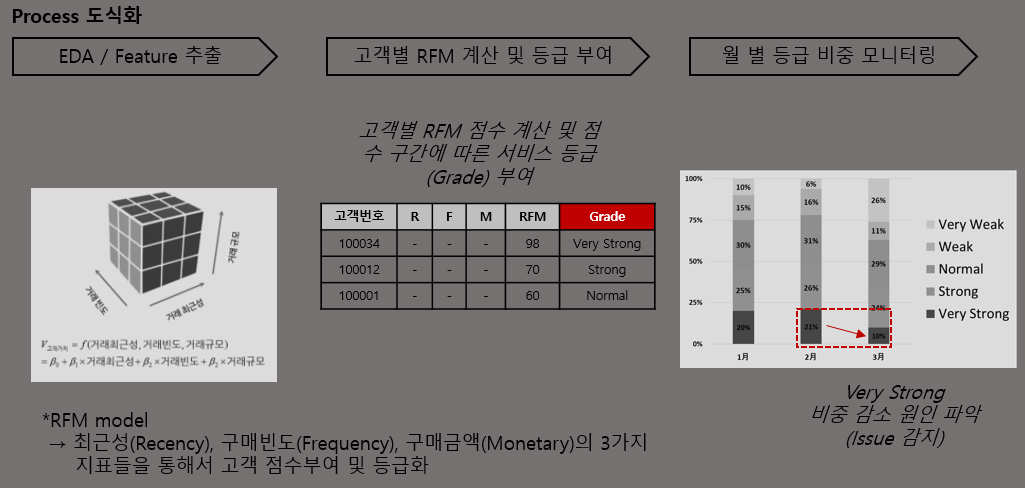

In [18]:
from re import A
from PIL import Image
Image.open('img18.PNG')

### Recency(최근성)

In [19]:
df['InvoiceDate'].str.split(' ').str[0]

0         12/1/2010
1         12/1/2010
2         12/1/2010
3         12/1/2010
4         12/1/2010
            ...    
541904    12/9/2011
541905    12/9/2011
541906    12/9/2011
541907    12/9/2011
541908    12/9/2011
Name: InvoiceDate, Length: 397884, dtype: object

split을 사용해서 송장 데이터에 날짜 데이터만 추출한다(시간은 제외)

In [20]:
df['Date'] = pd.to_datetime(df['InvoiceDate'].str.split(' ').str[0])
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01


object형태인 날짜 데이터를 datetime형태로 변환시켜준다

In [21]:
df['Date'].min(), df['Date'].max()

(Timestamp('2010-12-01 00:00:00'), Timestamp('2011-12-09 00:00:00'))

2010-12-01부터 2011-12-09까지의 데이터인 것을 알 수 있다

In [22]:
recency_df = df.groupby('CustomerID',as_index=False)['Date'].max()
recency_df.columns = ['CustomerID','LastPurchaseDate']
recency_df.head()

,CustomerID,LastPurchaseDate
0,12346.0,2011-01-18
1,12347.0,2011-12-07
2,12348.0,2011-09-25
3,12349.0,2011-11-21
4,12350.0,2011-02-02


가독성을 높이기 위해 as_index=False를 사용해 고객ID를 인덱스로 설정하지 않는다. 고객ID별 가장 마지막 구매일을 설정한다

In [23]:
recency_df['Recency'] = recency_df['LastPurchaseDate'].apply(lambda x : (df['Date'].max() - x).days)
recency_df.drop(columns=['LastPurchaseDate'],inplace=True)

In [24]:
recency_df.head(5)

,CustomerID,Recency
0,12346.0,325
1,12347.0,2
2,12348.0,75
3,12349.0,18
4,12350.0,310


고객의 가장 마지막 구매일로부터 몇일이 지났는지를 계산하기 위해 Recency변수를 생성한다

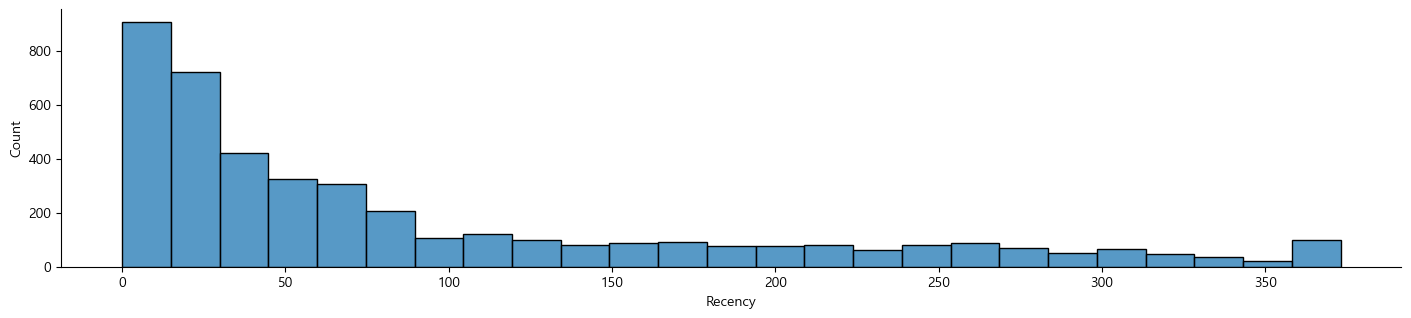

In [32]:
sns.displot(data = recency_df, x="Recency");
plt.gcf().set_size_inches(16, 3)

Recency(최근성)변수의 분포를 확인한 결과, 비교적 얼마 지나지 않은 고객들이 대부분인 것을 알 수 있다

### Frequency(최빈성)

In [26]:
frequency_df = df.copy()
frequency_df.drop_duplicates(subset=['CustomerID','InvoiceNo'], keep="first", inplace=True) 
frequency_df = frequency_df.groupby('CustomerID', as_index=False)['InvoiceNo'].count()
frequency_df.columns = ['CustomerID','Frequency']
frequency_df.head()

,CustomerID,Frequency
0,12346.0,1
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1


고객ID당 유니크한 Invoice를 1개의 주문건으로 인식하여 얼마나 자주 구매하고 있는지를 파악하기 위해 Frequency변수를 생성한다

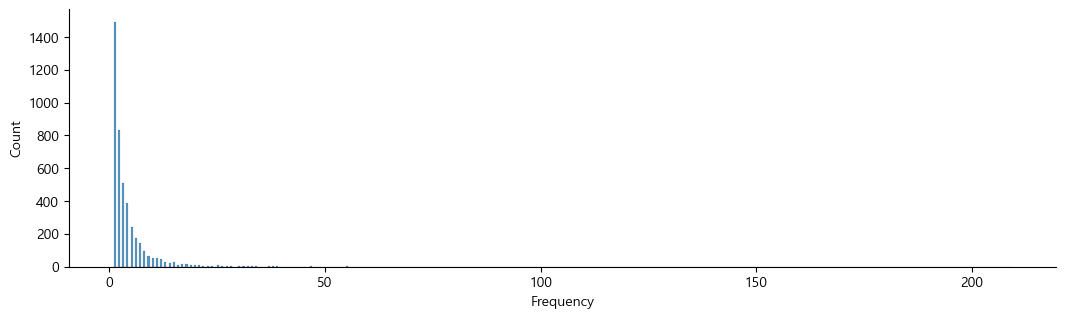

In [33]:
sns.displot(data = frequency_df, x="Frequency");
plt.gcf().set_size_inches(12, 3)

Frequency(최빈성)변수의 분포를 확인한 결과, 20이하인 고객들이 대부분인 것을 알 수 있다

### Monetary(금액)

In [30]:
df['Total_cost'] = df['UnitPrice'] * df['Quantity']
monetary_df=df.groupby('CustomerID',as_index=False)['Total_cost'].sum()
monetary_df.columns = ['CustomerID','Monetary']
monetary_df.head()

,CustomerID,Monetary
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


구매금액 = 구매개수(수량) * 구매단가(개당가격)  

구매금액을 파악하기 위해 Monetary변수를 생성한다

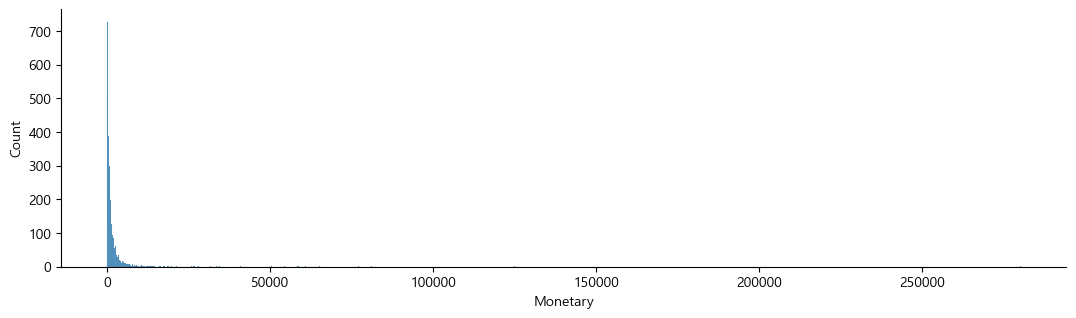

In [35]:
sns.displot(data = monetary_df, x="Monetary");
plt.gcf().set_size_inches(12, 3)

Monetary(금액)변수의 분포를 확인한 결과, 20000이하인 고객들이 대부분인 것을 알 수 있다

### RFM

In [36]:
rf = recency_df.merge(frequency_df,how='left',on='CustomerID')

rfm = rf.merge(monetary_df,how='left',on='CustomerID')

rfm.head(5)

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,310,1,334.40


Recency(최근성), Frequency(최빈성), Monetary(금액)을 하나의 지표로 만든다(RFM)

## RFM 활용 서비스 이용 수준 측정

In [37]:
from sklearn.preprocessing import minmax_scale

rfm['Recency'] = minmax_scale(rfm['Recency'], axis=0, copy=True)
rfm['Recency'] = 1-rfm['Recency']

rfm['Frequency'] = minmax_scale(rfm['Frequency'], axis=0, copy=True)

rfm['Monetary'] = minmax_scale(rfm['Monetary'], axis=0, copy=True)

rfm['Score']=rfm['Recency']+rfm['Frequency']+rfm['Monetary']

rfm

,CustomerID,Recency,Frequency,Monetary,Score
0,12346.0,0.128686,0.000000,0.275443,0.404130
1,12347.0,0.994638,0.028846,0.015368,1.038853
2,12348.0,0.798928,0.014423,0.006401,0.819751
3,12349.0,0.951743,0.000000,0.006259,0.958002
4,12350.0,0.168901,0.000000,0.001180,0.170081
...,...,...,...,...,...
4333,18280.0,0.257373,0.000000,0.000631,0.258004
4334,18281.0,0.517426,0.000000,0.000275,0.517701
4335,18282.0,0.981233,0.004808,0.000622,0.986663
4336,18283.0,0.991957,0.072115,0.007463,1.071535


Min max scale을 통해 최대값을 1, 최소값을 0으로 표준화하여 계산한다. Recency(최근성)은 숫자가 작을수록, 즉 최근 구매일이 얼마 지나지 않은 고객이 더 점수가 높게 설정한다

In [38]:
rfm['Score']=minmax_scale(rfm['Score'], axis=0, copy=True)*100
rfm['Score']=round(rfm['Score'],0)

In [39]:
rfm.head(5)

,CustomerID,Recency,Frequency,Monetary,Score
0,12346.0,0.128686,0.000000,0.275443,16.0
1,12347.0,0.994638,0.028846,0.015368,42.0
2,12348.0,0.798928,0.014423,0.006401,33.0
3,12349.0,0.951743,0.000000,0.006259,39.0
4,12350.0,0.168901,0.000000,0.001180,7.0


100을 곱해서 100점 만점으로 scaling한다

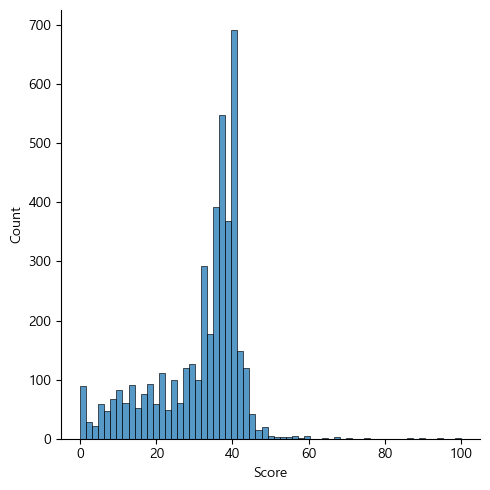

In [40]:
sns.displot(rfm['Score']);

In [43]:
import numpy as np

rfm['Grade'] = rfm['Score'].apply(lambda x : 'Very Strong' if x>=60 else 
                                  ('Strong' if x>=40 else 
                                   ('Normal' if x>=20 else 
                                    ('Weak' if x>=10 else 'Very Weak'))))
rfm.head(5)

,CustomerID,Recency,Frequency,Monetary,Score,Grade
0,12346.0,0.128686,0.000000,0.275443,16.0,Weak
1,12347.0,0.994638,0.028846,0.015368,42.0,Strong
2,12348.0,0.798928,0.014423,0.006401,33.0,Normal
3,12349.0,0.951743,0.000000,0.006259,39.0,Normal
4,12350.0,0.168901,0.000000,0.001180,7.0,Very Weak


Grade(점수) 구간화를 통해 점수별로 고객의 등급을 아래와 같이 설정한다  

- 60점 이상 : Very storong
- 40~60점 : Storng
- 20~40점 : Normal
- 10~20점 : Weak
- 0~10점 : Very Weak

In [44]:
df = pd.merge(df, rfm, how='left', on='CustomerID')
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Total_cost,Recency,Frequency,Monetary,Score,Grade
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01,15.30,0.002681,0.158654,0.019227,7.0,Very Weak
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,20.34,0.002681,0.158654,0.019227,7.0,Very Weak
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01,22.00,0.002681,0.158654,0.019227,7.0,Very Weak
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,20.34,0.002681,0.158654,0.019227,7.0,Very Weak
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,20.34,0.002681,0.158654,0.019227,7.0,Very Weak


기존 데이터와 고객의 등급(Grade) 데이터를 하나의 지표로 만든다

In [45]:
df['Date_1'] = df["Date"].dt.strftime("%Y-%m")
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Total_cost,Recency,Frequency,Monetary,Score,Grade,Date_1
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01,15.30,0.002681,0.158654,0.019227,7.0,Very Weak,2010-12
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,20.34,0.002681,0.158654,0.019227,7.0,Very Weak,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01,22.00,0.002681,0.158654,0.019227,7.0,Very Weak,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,20.34,0.002681,0.158654,0.019227,7.0,Very Weak,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,20.34,0.002681,0.158654,0.019227,7.0,Very Weak,2010-12


월별분석을 위해 연월만 새로운 변수로 정의한다

In [46]:
df_cus = df.groupby('Date_1',as_index=False)['CustomerID'].nunique()
df_cus.tail(5)

,Date_1,CustomerID
8,2011-08,935
9,2011-09,1266
10,2011-10,1364
11,2011-11,1664
12,2011-12,615


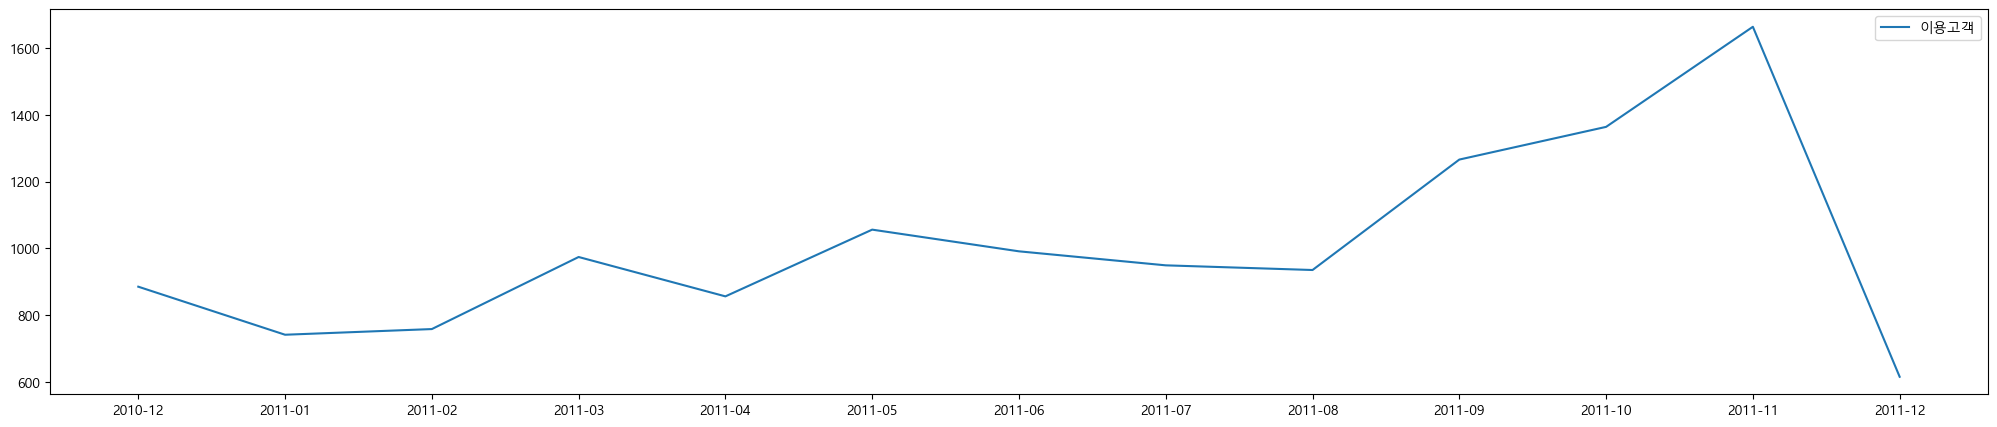

In [51]:
plt.plot(df_cus['Date_1'], df_cus['CustomerID'], label='이용고객');
plt.legend();
plt.gcf().set_size_inches(25, 5)

월별 이용 고객 현황을 확인한 결과, 2010/12 런칭 이후 사용자 수가 증가하고 2011/11 Peak를 달성했으나, 초기 사용자 수보다 급격하게 줄어드는 것을 알 수 있다

In [49]:
df_cnt = df.groupby('Date_1',as_index=False)['InvoiceNo'].nunique()
df_cnt.head(5)

,Date_1,InvoiceNo
0,2010-12,1400
1,2011-01,987
2,2011-02,997
3,2011-03,1321
4,2011-04,1149


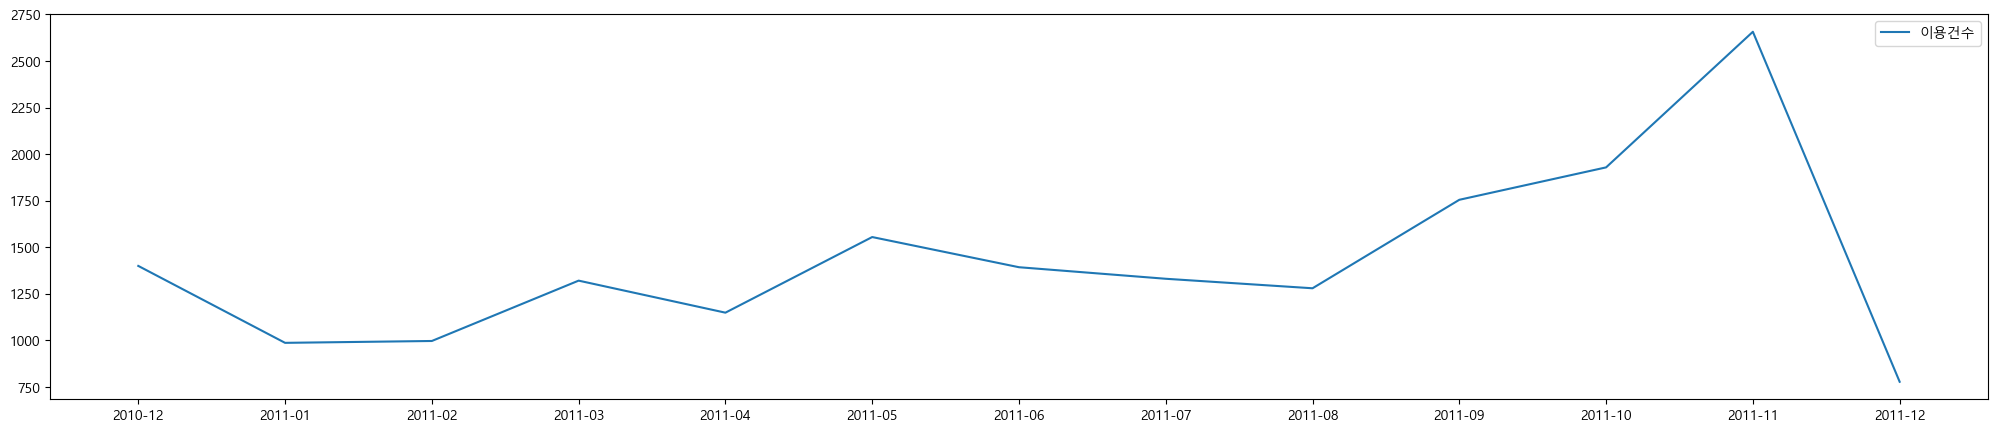

In [52]:
plt.plot(df_cnt['Date_1'], df_cnt['InvoiceNo'], label='이용건수');
plt.legend();
plt.gcf().set_size_inches(25, 5)

월별 이용 건수 현황을 확인한 결과, 월별 이용 고객수와 비슷한 양상을 보이는 것을 알 수 있다

In [53]:
df_country = df.groupby('Date_1',as_index=False)['Country'].nunique()
df_country.head(5)

,Date_1,Country
0,2010-12,22
1,2011-01,20
2,2011-02,24
3,2011-03,22
4,2011-04,24


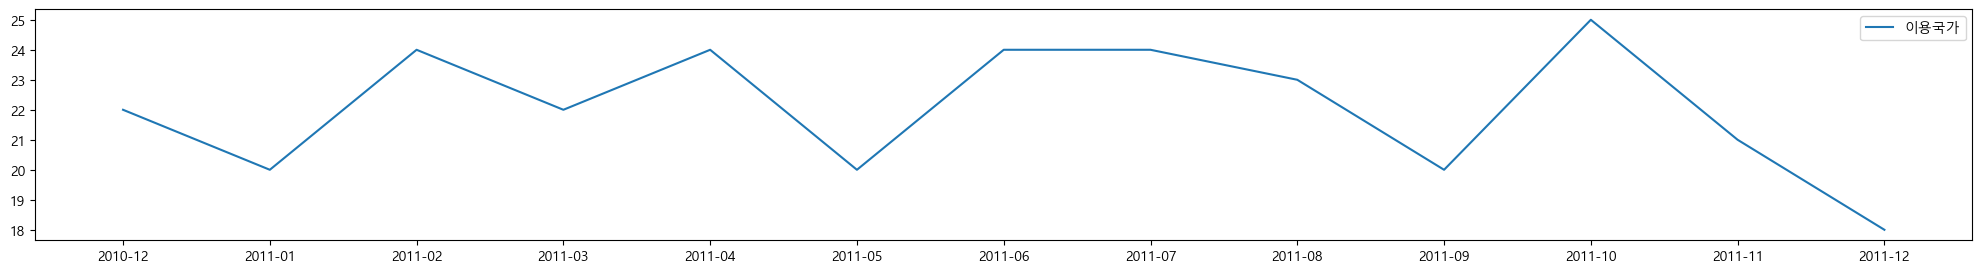

In [55]:
plt.plot(df_country['Date_1'], df_country['Country'], label='이용국가');
plt.legend();
plt.gcf().set_size_inches(25, 3)

월별 이용 국가 현황을 확인한 결과, 2011/01, 2011/05, 2011/09 급격하게 줄어드는 것을 알 수 있으며 2011/10 이후 초기 국가수보다 급격하게 줄어드는 것을 알 수 있다

In [56]:
pd.DataFrame(df.groupby(['Country'])['InvoiceNo'].nunique().sort_values(ascending=False)).head(10)

,InvoiceNo
Country,
United Kingdom,16646
Germany,457
France,389
EIRE,260
Belgium,98
Netherlands,94
Spain,90
Australia,57
Portugal,57


가장 주문을 많이 하는 나라는 United Kingdom이다

In [58]:
df_grade = df.groupby(['Date_1', 'Grade'],as_index=False)['CustomerID'].nunique()
df_grade.head(5)

,Date_1,Grade,CustomerID
0,2010-12,Normal,291
1,2010-12,Strong,397
2,2010-12,Very Strong,11
3,2010-12,Very Weak,144
4,2010-12,Weak,42


In [59]:
df_pivot = pd.pivot_table(df_grade,            
                      index = 'Date_1',        
                      columns = 'Grade',       
                      values = 'CustomerID')  

df_pivot.fillna(0, inplace=True)
df_pivot['total'] = df_pivot['Very Strong'] + df_pivot['Strong'] + df_pivot['Normal'] + df_pivot['Weak'] + df_pivot['Very Weak']


df_pivot.iloc[:,0] = (df_pivot.iloc[:,0] / df_pivot['total'])
df_pivot.iloc[:,1] = (df_pivot.iloc[:,1] / df_pivot['total'])
df_pivot.iloc[:,2] = (df_pivot.iloc[:,2] / df_pivot['total'])
df_pivot.iloc[:,3] = (df_pivot.iloc[:,3] / df_pivot['total'])
df_pivot.iloc[:,4] = (df_pivot.iloc[:,4] / df_pivot['total'])

df_pivot.drop(['total'], axis=1, inplace=True)
df_pivot

Grade,Normal,Strong,Very Strong,Very Weak,Weak
Date_1,,,,,
2010-12,0.328814,0.448588,0.012429,0.162712,0.047458
2011-01,0.349528,0.450742,0.014845,0.139001,0.045884
2011-02,0.377309,0.419525,0.014512,0.131926,0.056728
2011-03,0.388090,0.401437,0.012320,0.000000,0.198152
2011-04,0.394860,0.420561,0.014019,0.000000,0.170561
2011-05,0.428977,0.425189,0.012311,0.000000,0.133523
2011-06,0.560040,0.427851,0.012109,0.000000,0.000000
2011-07,0.543730,0.443625,0.012645,0.000000,0.000000
2011-08,0.533690,0.453476,0.012834,0.000000,0.000000


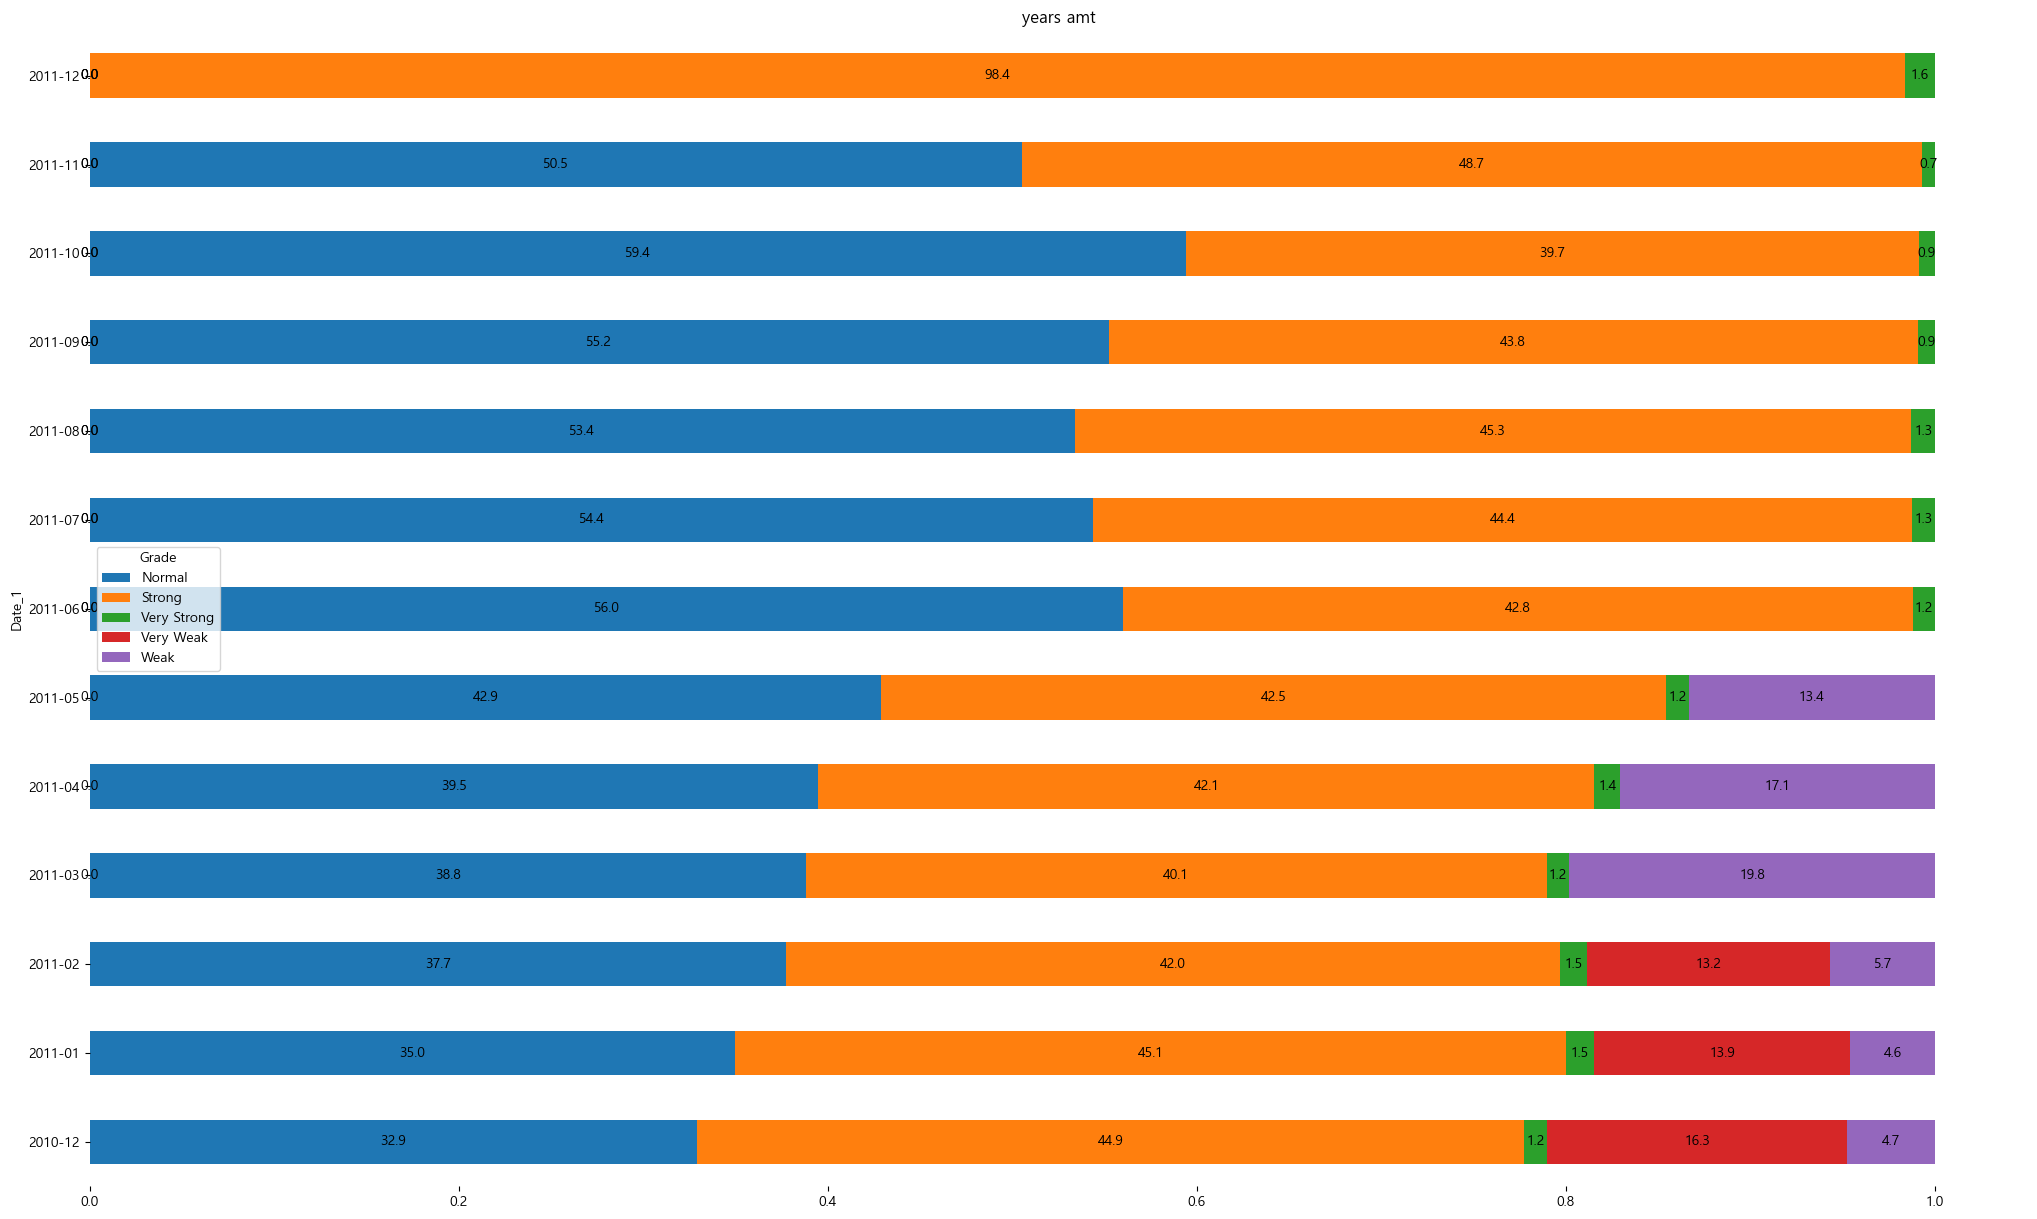

In [60]:
ax = df_pivot.plot(kind='barh', stacked=True, title="years amt", rot=0);
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.1f"%(width*100), xy=(left+width/2, bottom+height/2), ha='center', va='center', color='black');

plt.box(False)
plt.gcf().set_size_inches(25, 15)
plt.show()

월별 Grade 이용 비중을 확인한 결과, 시간이 지날수록 낮은 등급의 고객들은 사라지는 것을 알 수 있다. 2011/02 이후 Very Weak, 2011/05 이후 Very Weak/Weak, 2011/11 이후 Very Weak/Weak/Normal 등급의 고객들이 사라지고 있다. Very Strong 등급 고객은 매월 거의 비슷한 양상을 보이며, 2011/12은 Strong 등급 고객이 2배 가까이 급증하는 것을 확인할 수 있다

성과측정은 기본 베이스 코드(위의 전체 코드)를 가지고 익월 데이터를 추가 업로드해서 성과비교가 필요하다. 예를 들어, 위의 데이터로 예측한 지표 활용 서비스 사용 현황을 기반으로 등급별 고객에 대해 관리 전/후 모니터링을 통해 비교하는것이다. 추가로 정체 원인 파악 및 대응책 수립 및 실행이 필요해보인다